In [1]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [2]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://images.unsplash.com/photo-1485115905815-74a5c9fda2f5?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8OXx8c2lnbnxlbnwwfHwwfHw%3D&auto=format&fit=crop&w=500&q=60',
  'https://images.unsplash.com/photo-1573635033071-f515032ef1c5?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MTF8fHNpZ258ZW58MHx8MHx8&auto=format&fit=crop&w=500&q=60',
  'https://images.unsplash.com/photo-1499711860525-c485eb341d5e?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MTJ8fHNpZ258ZW58MHx8MHx8&auto=format&fit=crop&w=500&q=60',
  'https://images.unsplash.com/photo-1622646773971-2c31ccc60805?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MTd8fHNpZ258ZW58MHx8MHx8&auto=format&fit=crop&w=500&q=60',
  'https://images.unsplash.com/photo-1577534627694-6009aef7e3c6?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MTZ8fHNpZ258ZW58MHx8MHx8&auto=format&fit=crop&w=500&q=60'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

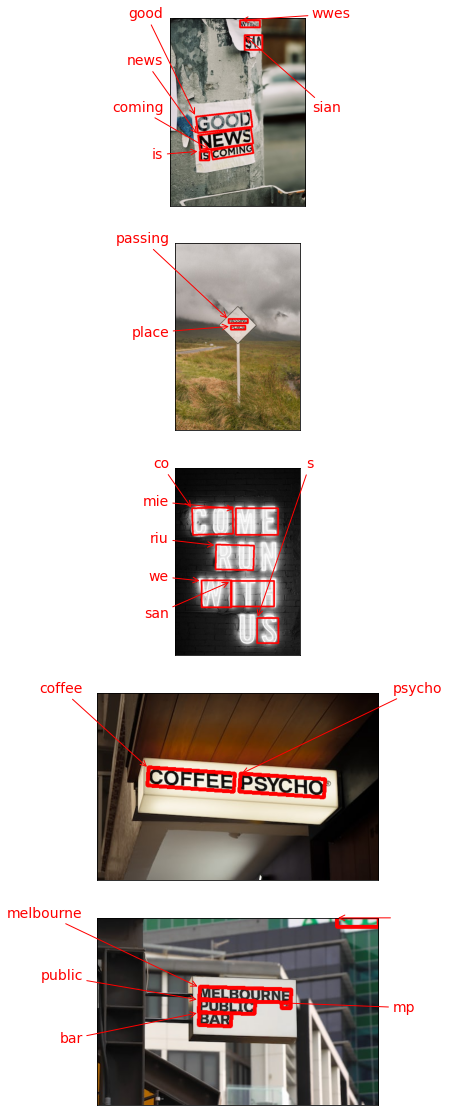

In [3]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [4]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/test_images'

cropped_folder = []
for i in range(9):
    img_file_path = work_dir + f'/ocr{i}.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

    cropped_image_path_list = crop_word_regions(img_file_path, work_dir+f'croped_ocr{i}')
       
    cropped_folder.append(cropped_image_path_list)
    

/aiffel/aiffel/ocr_python/test_imagescroped_ocr0/0000.png
/aiffel/aiffel/ocr_python/test_imagescroped_ocr0/0001.png
/aiffel/aiffel/ocr_python/test_imagescroped_ocr0/0002.png
/aiffel/aiffel/ocr_python/test_imagescroped_ocr0/0003.png
/aiffel/aiffel/ocr_python/test_imagescroped_ocr0/0004.png
/aiffel/aiffel/ocr_python/test_imagescroped_ocr0/0005.png
/aiffel/aiffel/ocr_python/test_imagescroped_ocr0/0006.png
/aiffel/aiffel/ocr_python/test_imagescroped_ocr0/0007.png
/aiffel/aiffel/ocr_python/test_imagescroped_ocr0/0008.png
/aiffel/aiffel/ocr_python/test_imagescroped_ocr0/0009.png
/aiffel/aiffel/ocr_python/test_imagescroped_ocr0/0010.png
/aiffel/aiffel/ocr_python/test_imagescroped_ocr0/0011.png
/aiffel/aiffel/ocr_python/test_imagescroped_ocr0/0012.png
/aiffel/aiffel/ocr_python/test_imagescroped_ocr0/0013.png
/aiffel/aiffel/ocr_python/test_imagescroped_ocr0/0014.png
/aiffel/aiffel/ocr_python/test_imagescroped_ocr0/0015.png
/aiffel/aiffel/ocr_python/test_imagescroped_ocr0/0016.png
/aiffel/aiffel

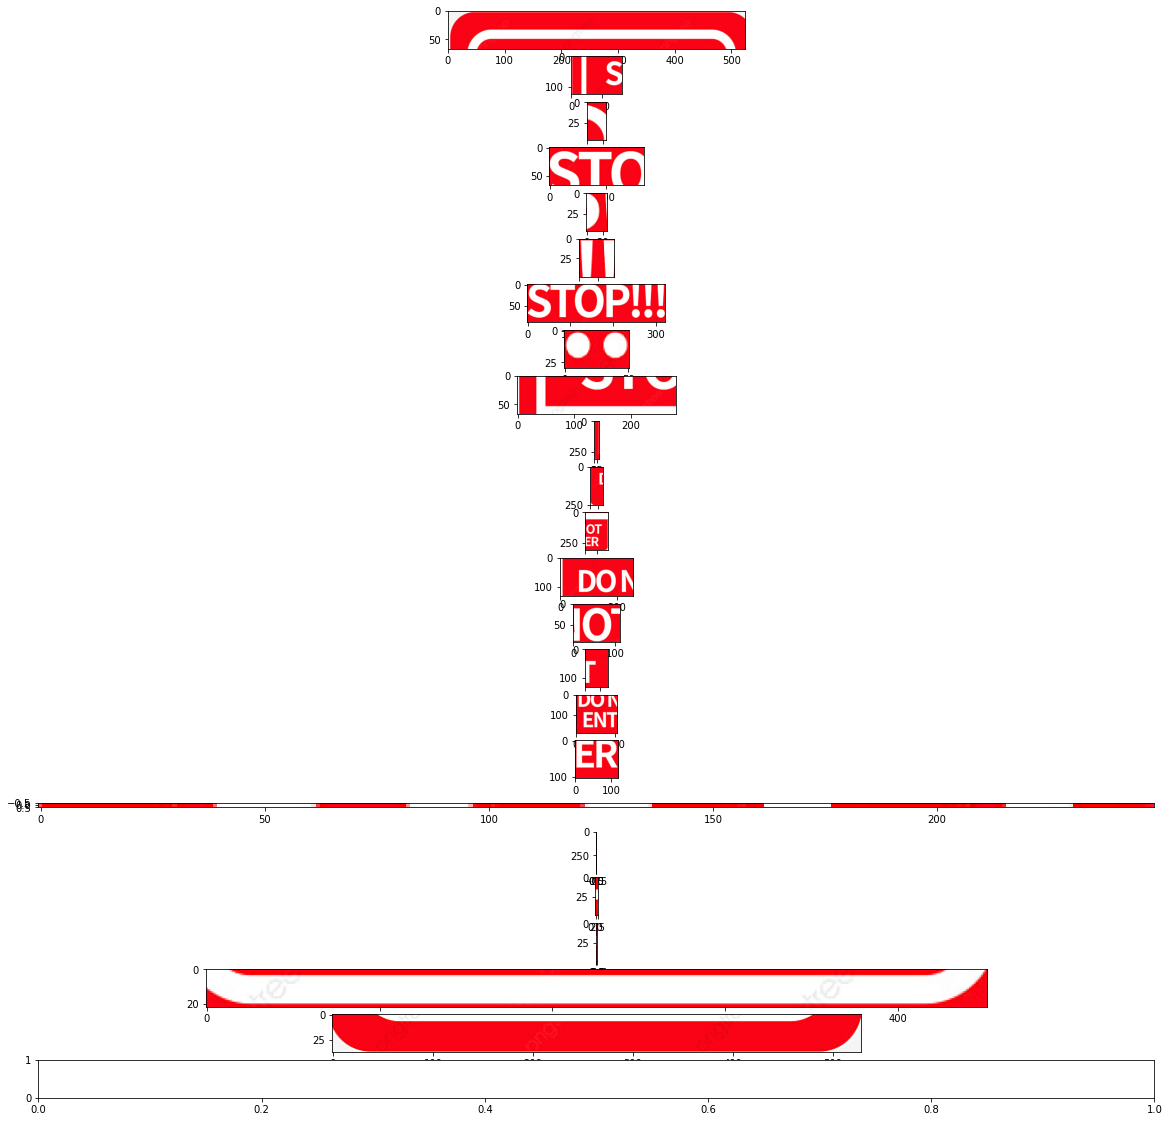

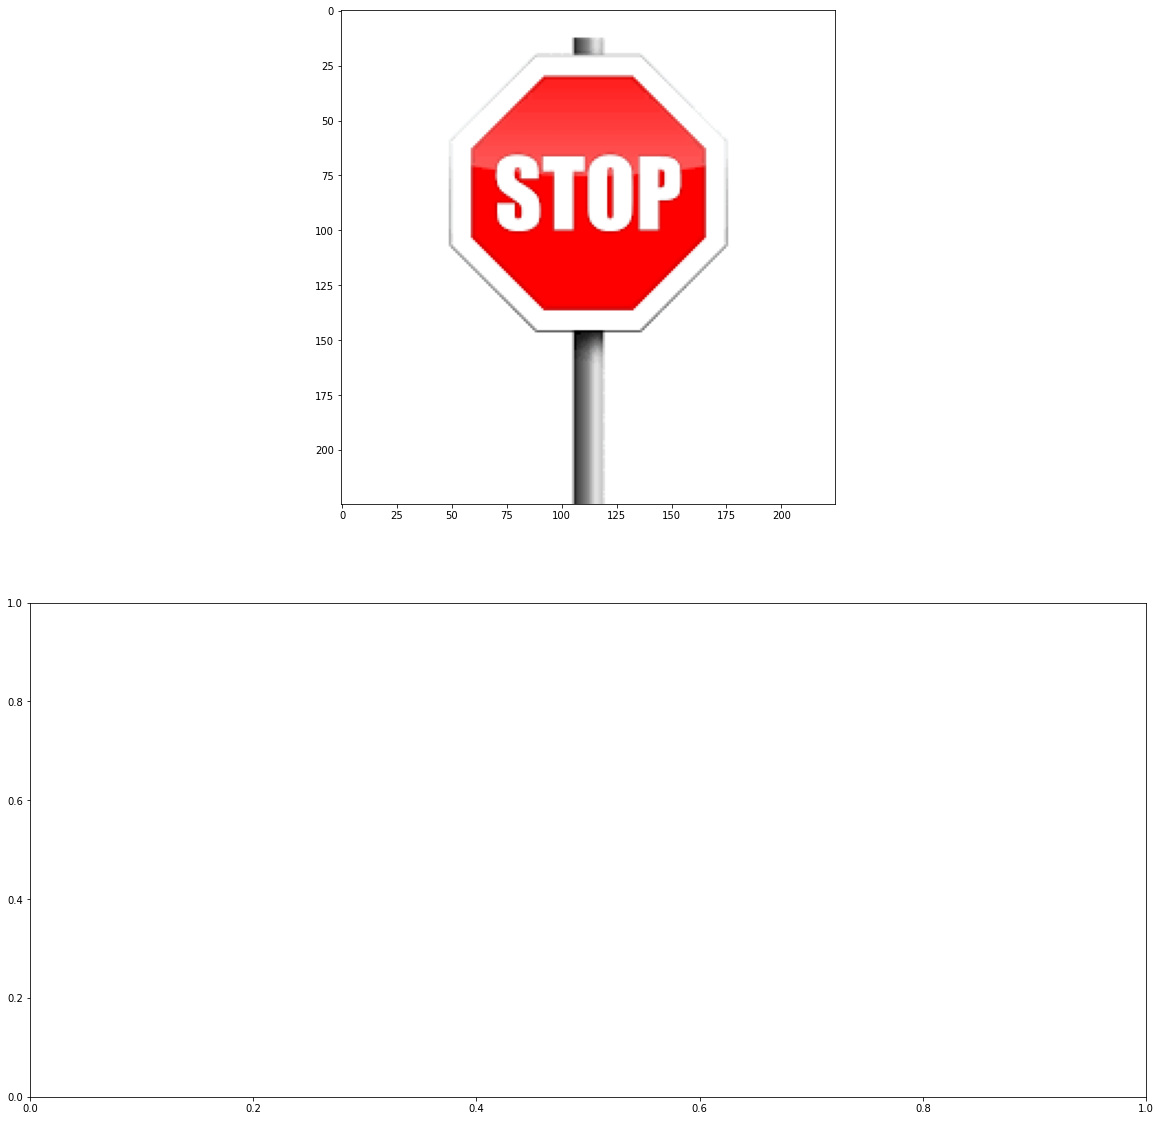

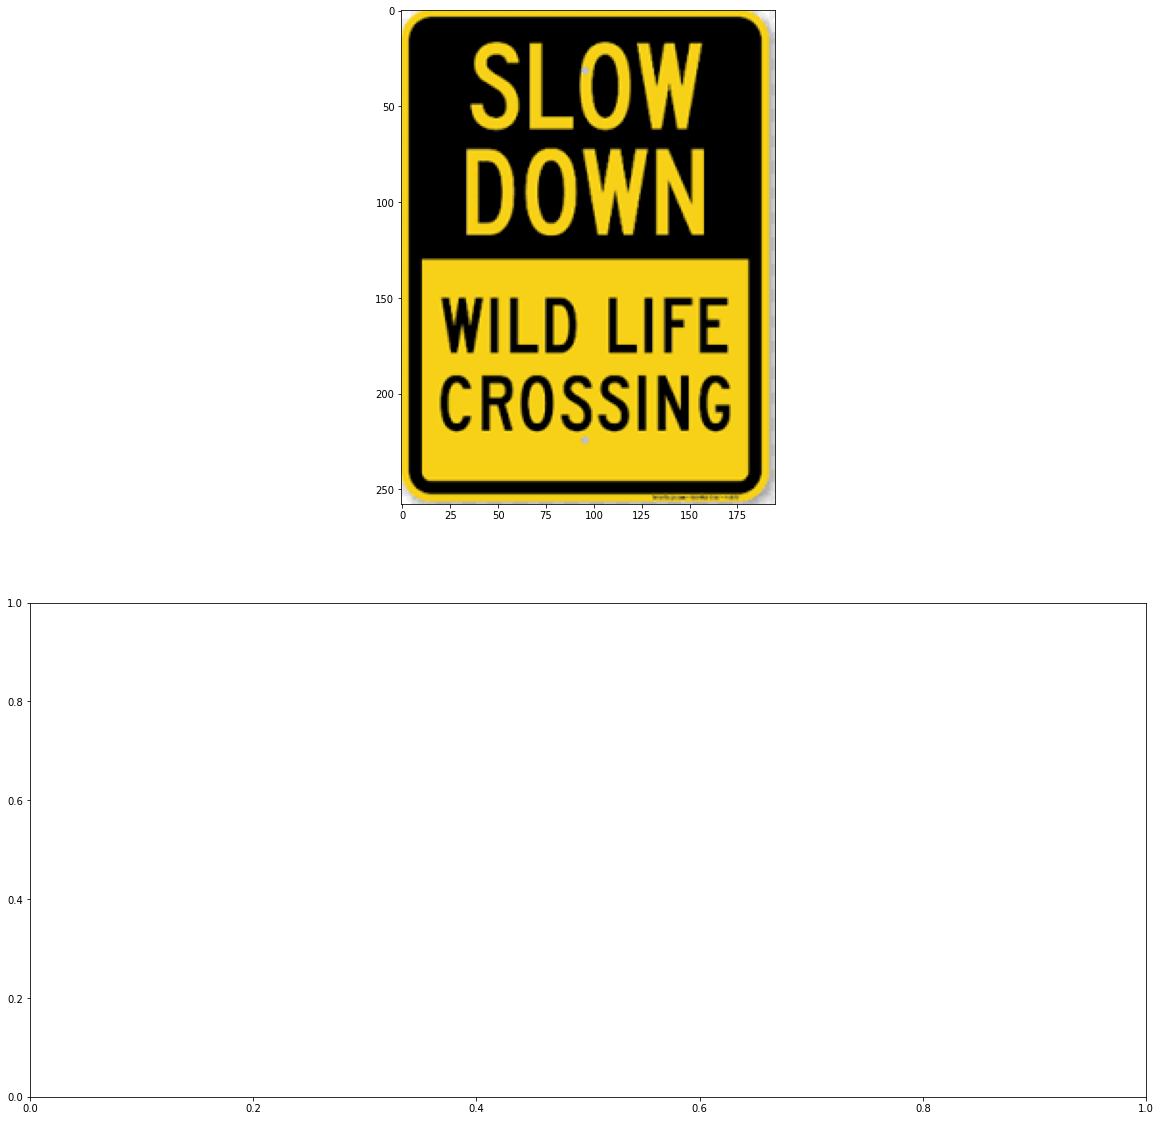

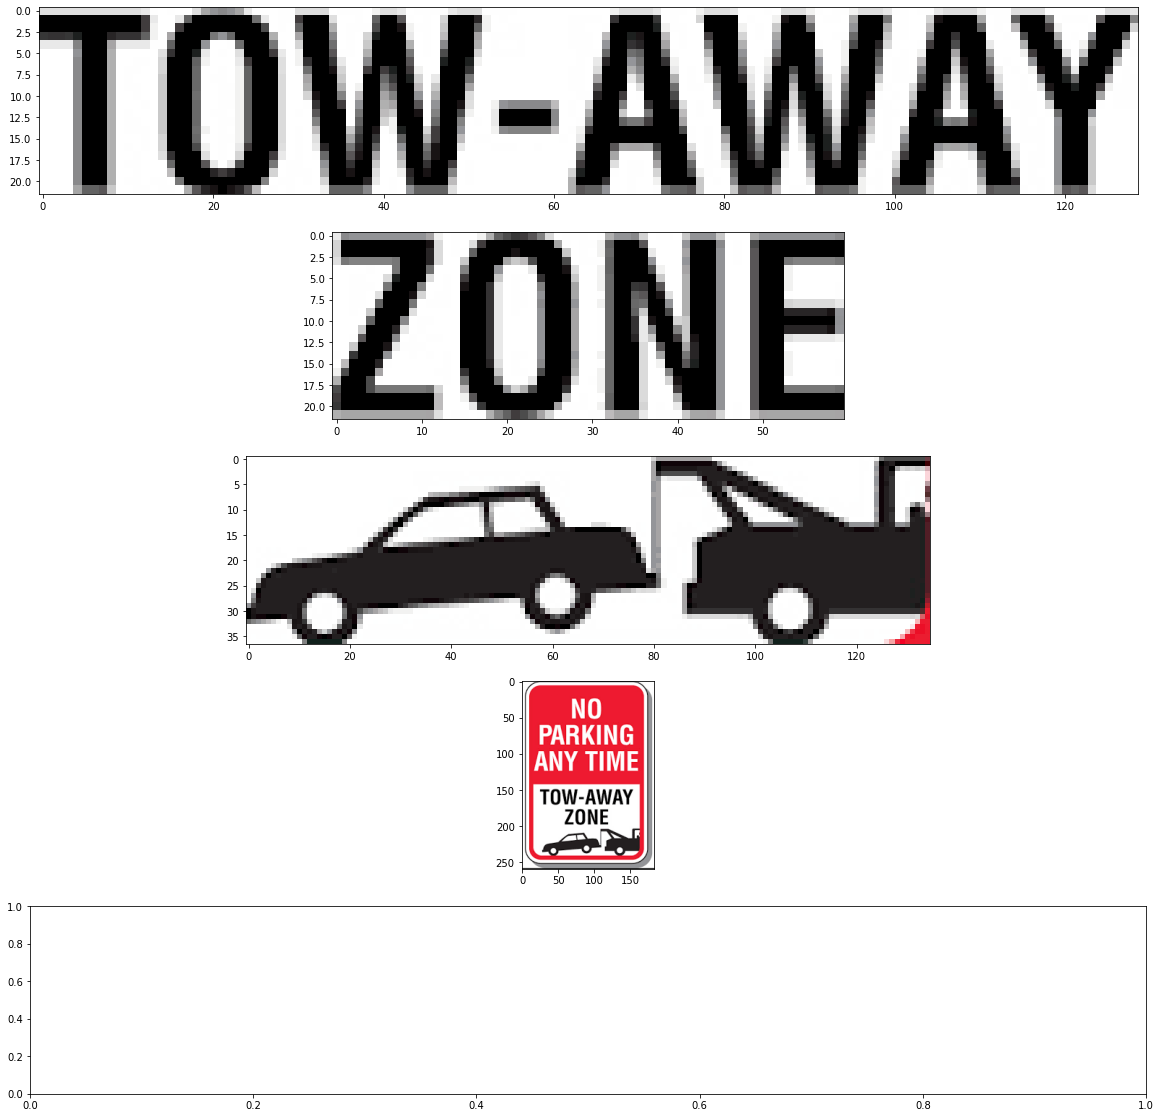

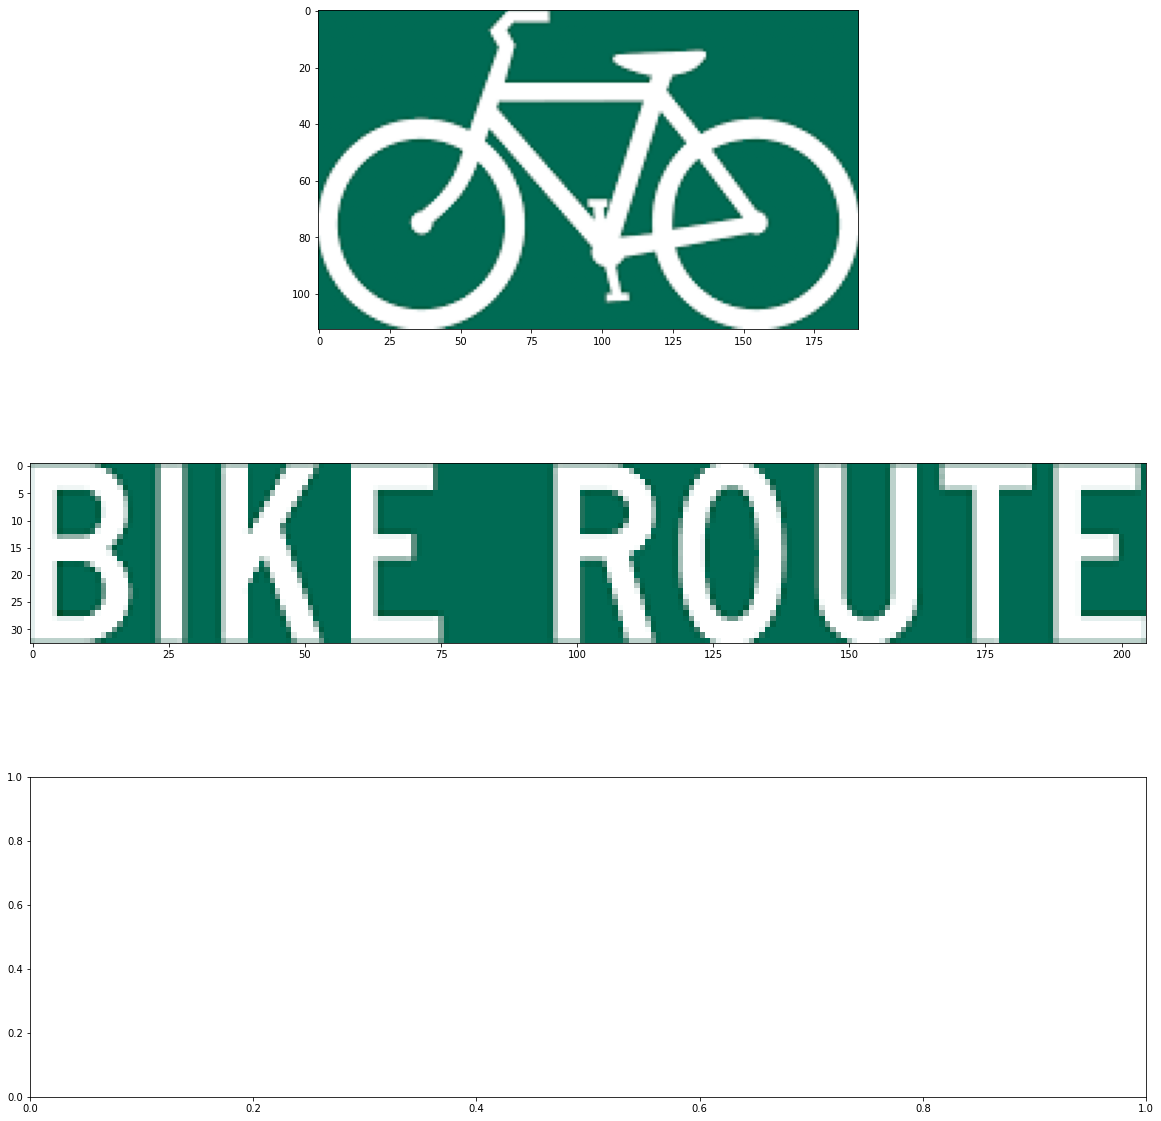

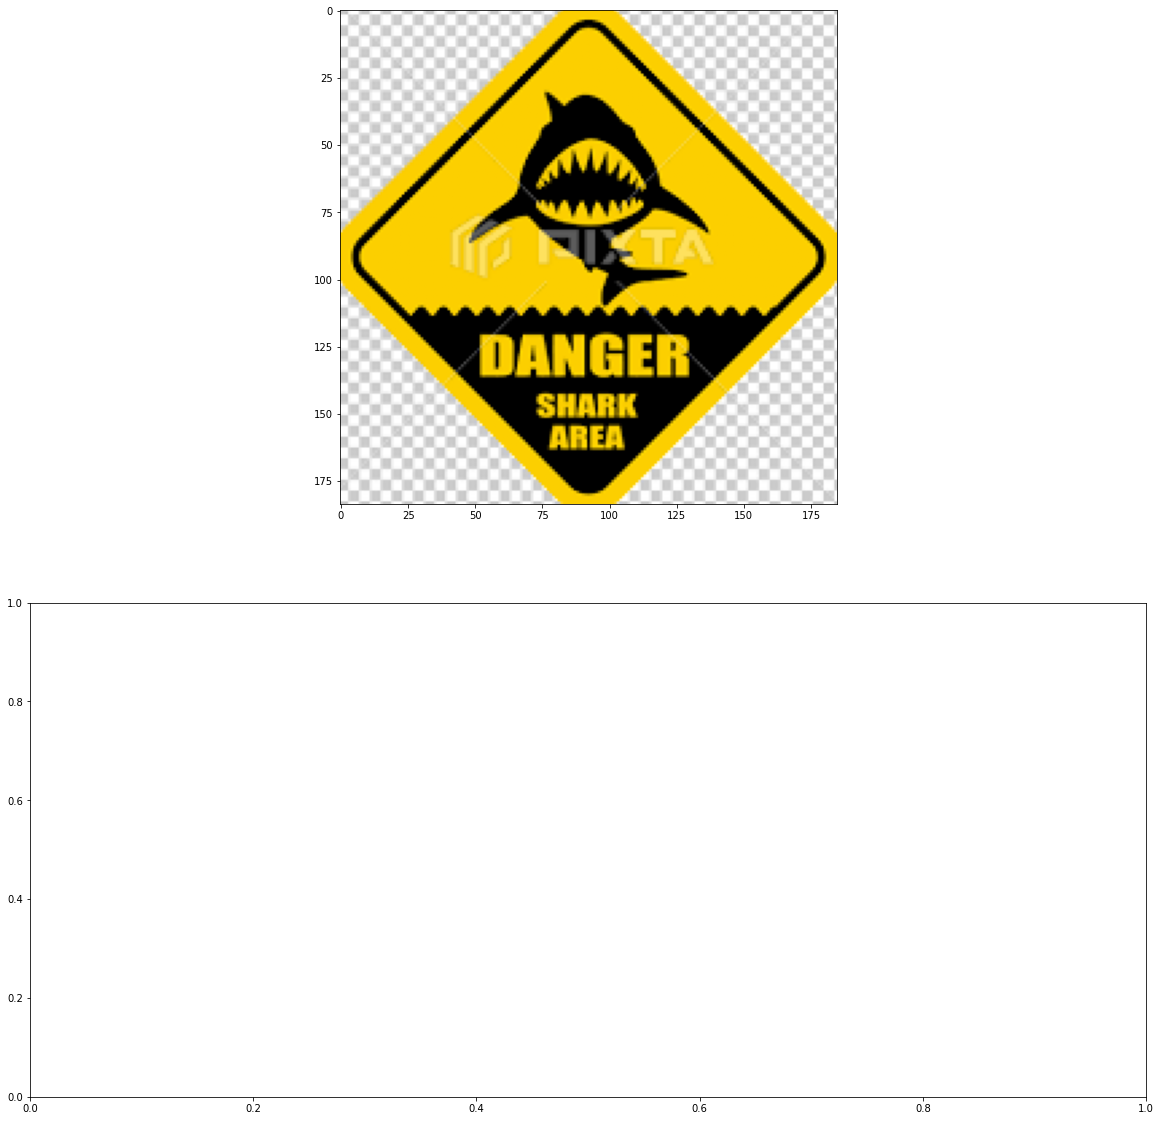

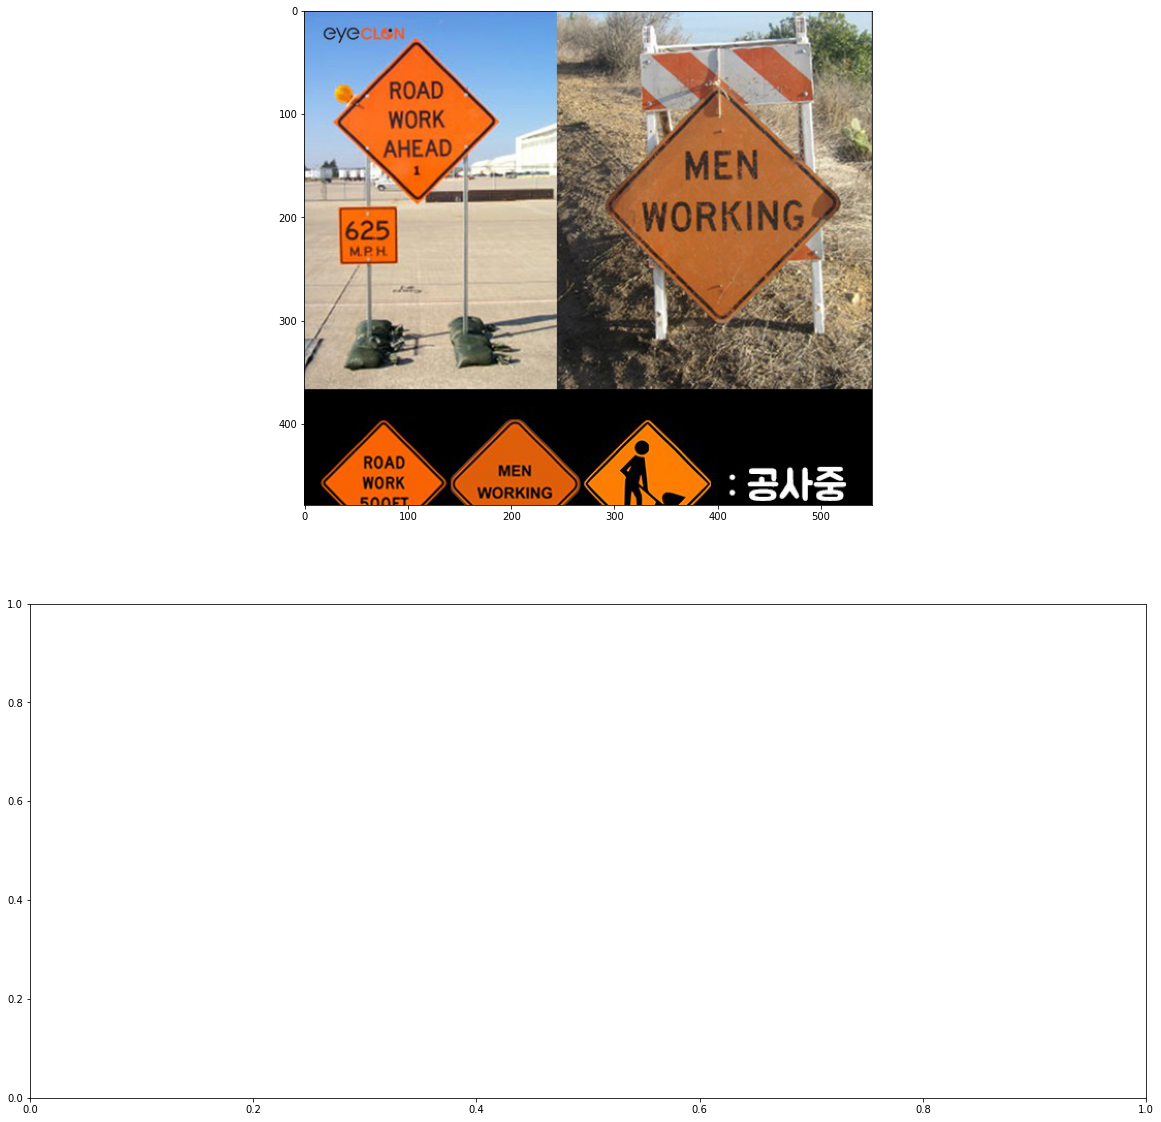

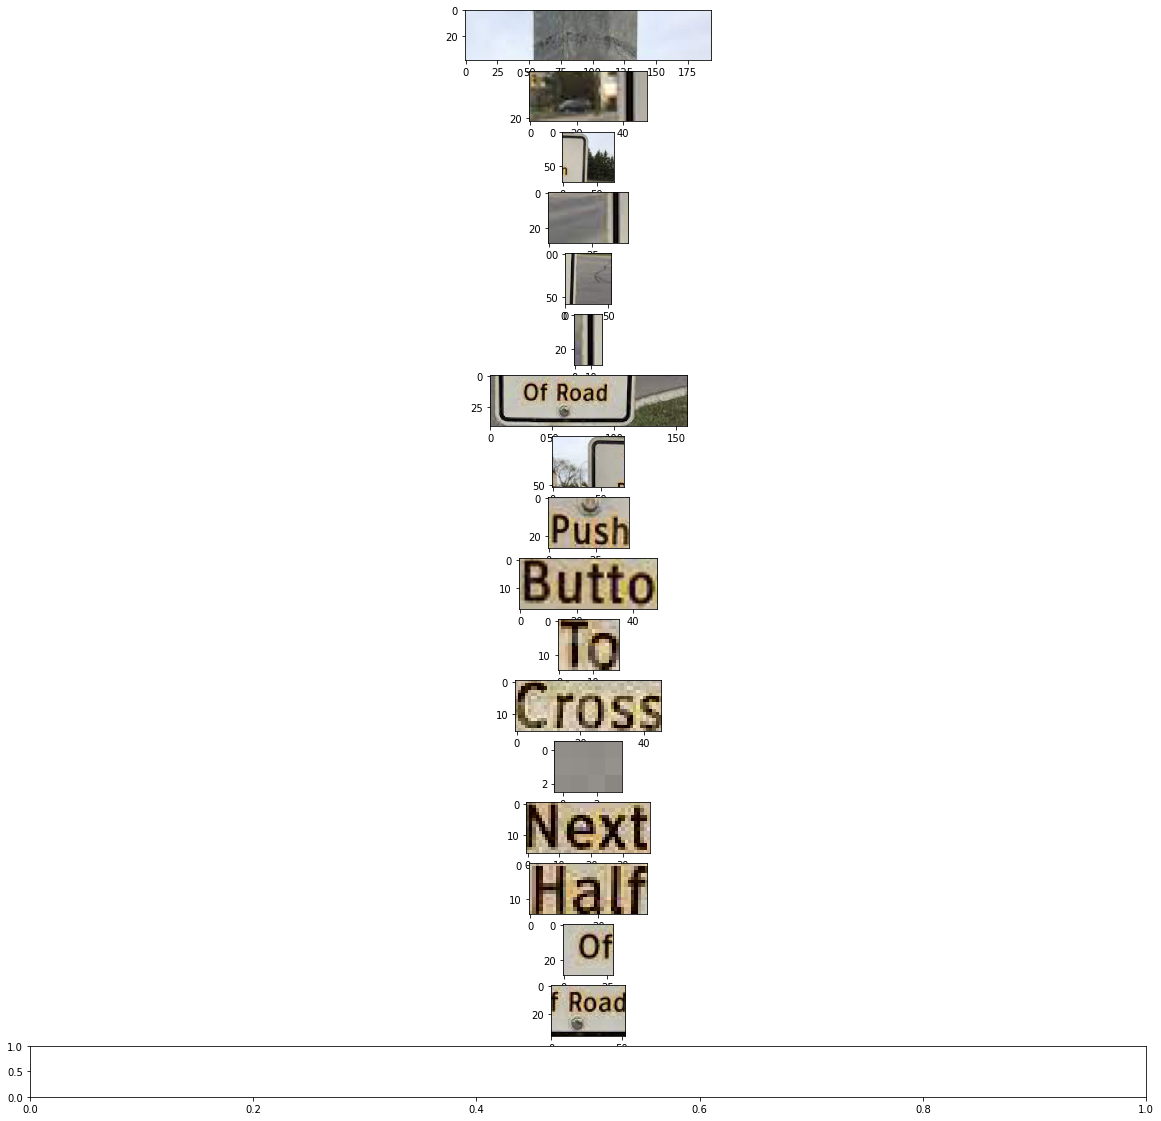

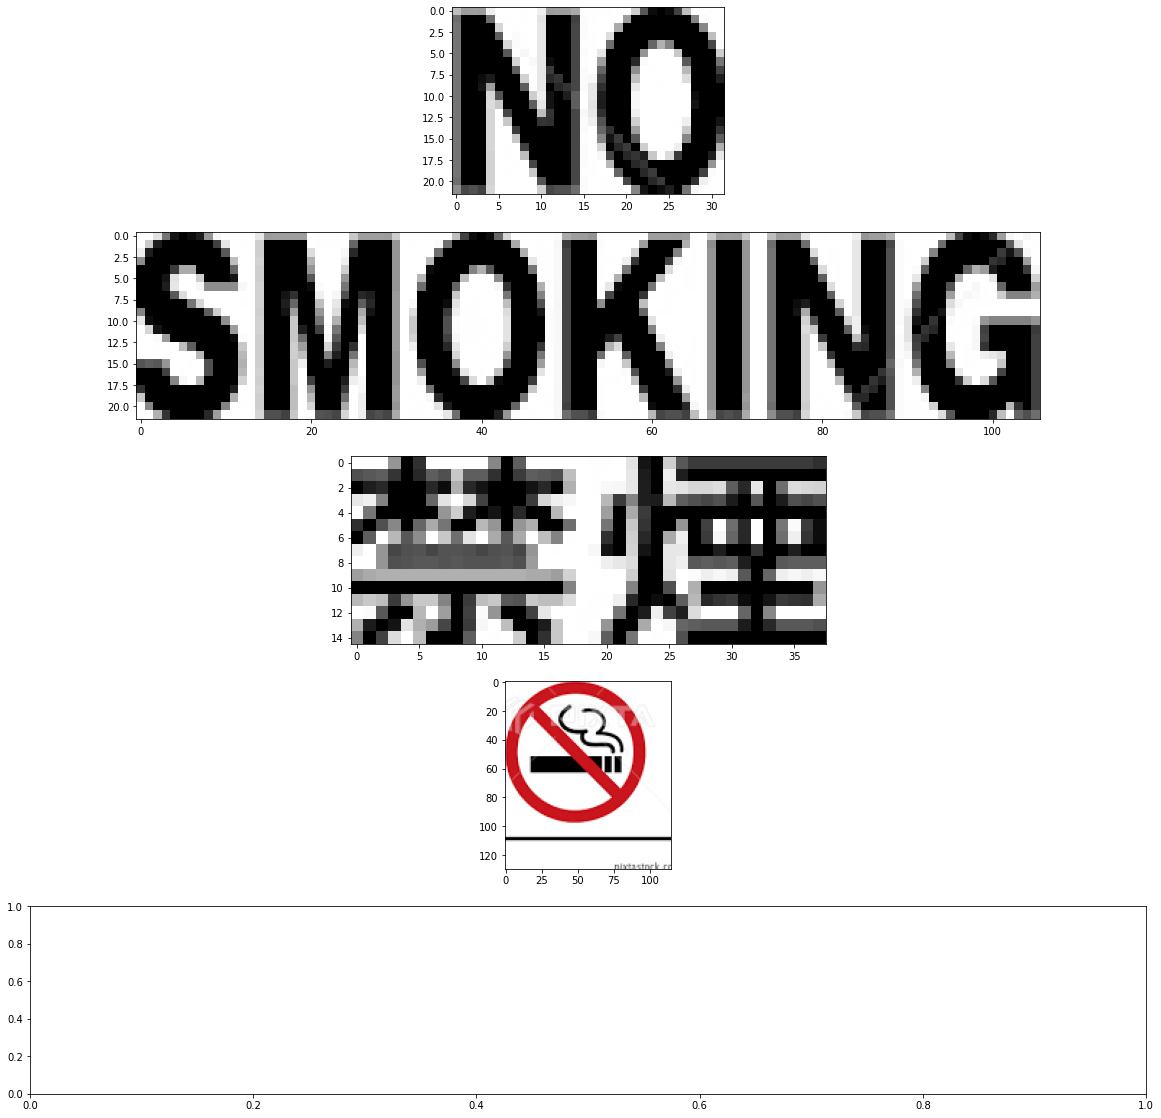

In [5]:
import matplotlib.image as mpimg
# Plot the predictions
for cropped_image_path_list in cropped_folder:
    fig,ax = plt.subplots(nrows = len(cropped_image_path_list)+1,figsize=(20, 20))
    for i in range(len(cropped_image_path_list)):
        img = mpimg.imread(cropped_image_path_list[i])
        ax[i].imshow(img)
        

In [6]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for cropped_image_path_list in cropped_folder:
        print('start recognition\n')
        for image_path in cropped_image_path_list:      
            image = Image.open(image_path)
            recognized_data = pytesseract.image_to_string(
                image, lang='eng',    # 한국어라면 lang='kor'
                config=custom_oem_psm_config,
                output_type=Output.DICT
            )
            print(recognized_data['text'])
        print('finish line '+"-"*100+'\n')

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

start recognition



»

CTO

J |

Ty

STOP!!!


. Se




| DIO}

(oy


rt

in

ee c60UmUmllt—“—~s~s—‘“<“<“<‘<ua“‘“‘é‘l‘( = =—h cc cc st—“‘“‘é*é*é*CCUSOR 6 i ssti“(it;w*é‘é*;*C*CUSOORR = sstiti‘él**CCCC ee 86h lll Cl lClhChChlhChlhUhUhlhlhC™CCC:t:~=“‘édlrr


|



\ SI wile LL

finish line ----------------------------------------------------------------------------------------------------

start recognition

©

finish line ----------------------------------------------------------------------------------------------------

start recognition

Ee

finish line ----------------------------------------------------------------------------------------------------

start recognition

TOW-AWAY

/ONE

ap ae


finish line ----------------------------------------------------------------------------------------------------

start recognition

ONS

tit Game GOON na

finish line ----------------------------------------------------------------------------------------------

## 회고

- keras-ocr 
    - https://images.unsplash.com 에서 'sign'으로 검색한 결과에서 무작위로 이미지를 따와서 잘 검출 및 인식하는지 확인해봄.
    - 검출은 거의 완벽해 보이고 인식도 상당한 수준으로 인식함.
- tesseract-ocr
    - 영어 표지판 이미지 8장을 이용해 표지판의 문자를 잘 인식하는지 확인해봄.
    - 잘린 이미지를 시각화 하여 어떤 이미지에서 어떤 문자를 따왔는지 확인해 봄.
    